In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))

In [3]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

In [4]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, statistical_tests, visualize

# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars_secondary_literature.parquet")

In [6]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407              None             None  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065      

In [7]:
df.columns.tolist()

['medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'year_publication',
 'literary_texts'

In [8]:
df.shape

(1041157, 77)

# Publishers

In [9]:
df.columns.tolist()

['medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'year_publication',
 'literary_texts'

In [10]:
#df.drop(columns="none", inplace=True)


In [11]:

round(df["publisher"].notna().sum() / df.shape[0], 2)*100



98.0

In [12]:
df.loc[df["publisher"].fillna("").str.contains("Vervuert")][["year","source","publisher"]].sample(20)

year   source                                       publisher
ppn                                                                      
270969543   1999  k10plus                                        Vervuert
061541737   1999    hebis                                Vervuert {[u.a.]
586131310   2009  k10plus                         Iberoamericana|Vervuert
026032007   1993    hebis                                        Vervuert
870544934   2016  k10plus  Universidad de Navarra|Iberoamericana|Vervuert
370216261   2003  k10plus                Iberoamericana|Vervuert|Vervuert
242306616   1998  k10plus                  Vervuert [u.a.]|Iberoamericana
519694953   2006  k10plus                  Vervuert [u.a.]|Iberoamericana
715397281   2012  k10plus                         Iberoamericana|Vervuert
225077930   1997  k10plus                         Vervuert|Iberoamericana
124288510   2004    hebis                 Iberoamericana {[u.a.]|Vervuert
862375886   2016  k10plus                         Iberoamericana|Vervuert
18164228X   1995  k10plus                  Vervuert [u.a.]|Iberoamericana
1026699371  2018  k10plus                         Iberoamericana|Vervuert
484885030   1998  k10plus                         Iberoamericana|Vervuert
1698546629  2017  k10plus                         Iberoamericana|Vervuert
1039857728  2018  k10plus                         Iberoamericana|Vervuert
883737701   2017  k10plus                         Iberoamericana|Vervuert
179976044   2006    hebis                         Vervuert|Iberoamericana
402681738   2017    hebis                         Iberoamericana|Vervuert

In [13]:
df.loc[df["publisher"].fillna("").str.contains("France")][["year","source","publisher"]].sample(20)

year   source                         publisher
ppn                                                        
1602182280  1995  k10plus                 Mercure de France
021299404   1983  k10plus           Presses Univ. de France
1109784155  1993  k10plus               Pr. Univ. de France
719899591   2012  k10plus           Éd. France-Empire Monde
273940295   1990  k10plus                 Mercure de France
113975139   1991  k10plus           Presses univ. de France
309525276   1999  k10plus           Presses Univ. de France
024485314   1991    hebis           Presses Univ. de France
109358856X  1990  k10plus  Encyclopaedia Universalis France
224836048   1996  k10plus  Presses Universitaires de France
1632749041  1998  k10plus  Presses Universitaires de France
1629849189  1982  k10plus                 Mercure de France
307143244   1993  k10plus      Pr. Universitaires de France
334875234   1999  k10plus           Presses Univ. de France
238665593   1997  k10plus           Presses Univ. de France
023303689   1991    hebis           Presses Univ. de France
027438589   1983  k10plus            Presses Univ.de France
027386449   1983  k10plus           Presses Univ. de France
051493489   1983    hebis           Presses Univ. de France
043480012   1992  k10plus           Presses Univ. de France

In [14]:
df.loc[df["publisher"].fillna("").str.contains("Lang")][["year","source","publisher"]].sample(20)

year   source                    publisher
ppn                                                   
007550790   1987    hebis                         Lang
191562238   1996  k10plus                         Lang
323796680   2001  k10plus                         Lang
22756233X   1997  k10plus                         Lang
473321297   2004  k10plus                         Lang
365019151   2004  k10plus                Langenscheidt
837343119   2015  k10plus                         Lang
317930699   2000  k10plus                         Lang
024082252   1986  k10plus                         Lang
004736508   1986    hebis                         Lang
1010385585  2017  k10plus  Langenscheidt GmbH & Co. KG
236407392   1997  k10plus                Langenscheidt
640836542   2011  k10plus                         Lang
135584906   2006    hebis                Langenscheidt
584297467   2009  k10plus                         Lang
847880427   2016  k10plus           Peter Lang Edition
004475755   1985    hebis                         Lang
1083849727  1987  k10plus                         Lang
132717778   1993  k10plus                         Lang
316859060   2000  k10plus                         Lang

In [15]:
df["publisher"]

ppn
1642067407                           Seuil
1678415065               De Gruyter Mouton
1678415065               De Gruyter Mouton
1678415065               De Gruyter Mouton
1678415065               De Gruyter Mouton
                          ...             
448323834     Vervuert Verlagsgesellschaft
448323834     Vervuert Verlagsgesellschaft
44832184X     Vervuert Verlagsgesellschaft
44832184X     Vervuert Verlagsgesellschaft
44832184X     Vervuert Verlagsgesellschaft
Name: publisher, Length: 1041157, dtype: object

In [16]:
df["publisher"].str.replace(r"(?:de|ed|univ|verl|verlag|perss|ag)", r"", flags=re.I)

ppn
1642067407                     Seuil
1678415065            Gruyter Mouton
1678415065            Gruyter Mouton
1678415065            Gruyter Mouton
1678415065            Gruyter Mouton
                       ...          
448323834     Vervuert sgesellschaft
448323834     Vervuert sgesellschaft
44832184X     Vervuert sgesellschaft
44832184X     Vervuert sgesellschaft
44832184X     Vervuert sgesellschaft
Name: publisher, Length: 1041157, dtype: object

In [17]:
df["publisher"].value_counts().head(50)

Lang                          32314
De Gruyter                    18949
Gallimard                     17870
Narr                          14399
Klett                         12661
Niemeyer                      11902
Champion                      10329
Droz                           8949
Langenscheidt                  8414
L'Harmattan                    7400
Suhrkamp                       6306
Fink                           6079
Iberoamericana|Vervuert        5962
Presses Univ. de France        5956
Winter                         5948
Mondadori                      5450
Hueber                         5433
Rodopi                         4996
Classiques Garnier             4645
Bulzoni                        4266
Einaudi                        4215
de Gruyter                     4162
Vervuert                       3964
Cornelsen                      3785
Romanistischer Verl.           3774
Larousse                       3662
Olschki                        3608
Reclam                      

In [18]:
df["publisher_mod"] = df["publisher"]
df["publisher_mod"] = df["publisher_mod"].str.replace(r"\[u\.a\.\]", r"", flags=re.I|re.M)
df["publisher_mod"] = df["publisher_mod"].str.replace(r"[^\w\s]", r" ", flags=re.I|re.M)
df["publisher_mod"] = df["publisher_mod"].str.replace(r"(of|éditeur|Verlagsgesellschaft|verlagsgesellschaft|publ|de|ed|univ|verl|verlag|perss|ag|publisher|pub|press|éd|presses|und|'|für|gmbh|du|editorial|la|pr|universitaires|universitätsverlag|universitätsverl|l|university press)[\s$]", r" ", flags=re.I|re.M)
df["publisher_mod"] = df["publisher_mod"].str.replace(r"(verlag|university press|press)$", r" ", flags=re.I|re.M)
df["publisher_mod"] = df["publisher_mod"].str.replace(r"verlagsgesellschaft", r"", flags=re.I|re.M)
df["publisher_mod"] = df["publisher_mod"].str.replace(r"gmbh", r"", flags=re.I|re.M)

df["publisher_mod"] = df["publisher_mod"].str.replace(r"\s\s+", r" ")


In [19]:
df.loc[df["publisher"].fillna("").str.contains("transcript")][["year","source","publisher","publisher_mod"]].sample(20)

year   source          publisher publisher_mod
ppn                                                       
1658527453  2012  k10plus         transcript    transcript
824927788   2015  k10plus   transcript Verl.   transcript 
67976738X   2012  k10plus         transcript    transcript
67976738X   2012  k10plus         transcript    transcript
505547147   2006  k10plus   transcript-Verl.   transcript 
47474793X   2014    hebis  transcript Verlag   transcript 
866219722   2016  k10plus  transcript-Verlag   transcript 
860170314   2017  k10plus         transcript    transcript
433894075   2019    hebis         transcript    transcript
866219722   2016  k10plus  transcript-Verlag   transcript 
1615192999  2016  k10plus         transcript    transcript
1015634702  2018  k10plus  transcript-Verlag   transcript 
1659466695  2013  k10plus         transcript    transcript
100614255X  2017  k10plus  transcript-Verlag   transcript 
464761379   2006    hebis  transcript Verlag   transcript 
588663891   2009  k10plus   transcript-Verl.   transcript 
426545877   2018    hebis         transcript    transcript
787745391   2014  k10plus         transcript    transcript
1049627350  2018  k10plus         transcript    transcript
1653284757  2011  k10plus         transcript    transcript

In [20]:
df.loc[df["publisher"].fillna("").str.contains("Oxford")][["year","source","publisher","publisher_mod"]].sample(20)

year   source                                          publisher  \
ppn                                                                            
330632566   2002  k10plus                            Oxford University Press   
780497570   2015  k10plus                                 Oxford Univ. Press   
799438022   2010  k10plus                            Oxford University Press   
306146045   1999  k10plus                            Oxford University Press   
689143508   2012  k10plus                                 Oxford Univ. Press   
102015618X  2018  k10plus                            Oxford University Press   
799439843   2005  k10plus                            Oxford University Press   
1048349756  2019  k10plus                            Oxford University Press   
220122571   2008    hebis  The Arcadian Library in assoc. with Oxford Uni...   
813755891   2011  k10plus                            Oxford University Press   
1696407702  2009  k10plus                            Oxford University Press   
046733329   1995    hebis                                 Oxford Univ. Press   
682533416   2012  k10plus                                 Oxford Univ. Press   
322123429   2000  k10plus                            Oxford University Press   
358856361   2003  k10plus                            Oxford University Press   
216290198   1996  k10plus           Universitas|Oxford : Voltaire Foundation   
273307665   1985  k10plus                            Oxford University Press   
169656235X  2012  k10plus                            Oxford University Press   
822984180   2016  k10plus                            Oxford University Press   
799438138   2006  k10plus                            Oxford University Press   

                                         publisher_mod  
ppn                                                     
330632566                                      Oxford   
780497570                                      Oxford   
799438022                                      Oxford   
306146045                                      Oxford   
689143508                                      Oxford   
102015618X                                     Oxford   
799439843                                      Oxford   
1048349756                                     Oxford   
220122571   The Arcadian Library in assoc with Oxford   
813755891                                      Oxford   
1696407702                                     Oxford   
046733329                                      Oxford   
682533416                                      Oxford   
322123429                                      Oxford   
358856361                                      Oxford   
216290198       Universitas Oxford Voltaire Foundation  
273307665                                      Oxford   
169656235X                                     Oxford   
822984180                                      Oxford   
799438138                                      Oxford

In [21]:
df.sample(20, random_state=2021)[["publisher","publisher_mod"]]

publisher         publisher_mod
ppn                                                         
1653286482      Walter de Gruyter GmbH       Walter Gruyter 
049327437     Aufbau-Taschenbuch-Verl.   Aufbau Taschenbuch 
501555110                      Peniope               Peniope
802439152      Oxford University Press               Oxford 
857767402   Edinburgh University Press            Edinburgh 
528291602                        Semar                 Semar
222427426                Langenscheidt         Langenscheidt
343840405                         None                  None
021503133      Presses Univ. de France                France
303757841                       Hatier                Hatier
054694965                       Reclam                Reclam
030330874                      Grasset               Grasset
348117922                         None                  None
010977562                Quai Voltaire         Quai Voltaire
441528864          Voltaire Foundation   Voltaire Foundation
688429475             Alcalá Grupo Ed.         Alcalá Grupo 
1619658860                       Klett                 Klett
1087553091        Imprimerie Nationale  Imprimerie Nationale
212196251                         Lang                  Lang
744050162         Inst. für Romanistik       Inst Romanistik

In [22]:
df.loc[df["publisher"].fillna("").str.contains("France")][["year","source","publisher","publisher_mod"]].sample(20)

year   source                                          publisher  \
ppn                                                                            
1614017182  1983  k10plus                                Pr. Univ. de France   
022924086   1983  k10plus                            Presses Univ. de France   
1637962797  1995  k10plus                   Presses Universitaires de France   
272901628   1986  k10plus                            Presses univ. de France   
277429218   1992  k10plus                            Presses Univ. de France   
326777873   2000  k10plus                            Presses Univ. de France   
148705200   1993  k10plus                            Presses Univ. de France   
026279584   1991  k10plus                            Presses Univ. de France   
812496175   2014  k10plus  Bibliothèque nationale de France|Classiques Ga...   
061164127   1998    hebis                            Presses Univ. de France   
253363187   1998  k10plus                            Presses Univ. de France   
188052445   2003    hebis                            Presses Univ. de France   
026454769   1993    hebis                            Presses Univ. de France   
026650290   1987  k10plus                            Presses Univ. de France   
1082257257  1983  k10plus                            France-Ibérie Recherche   
279928742   1997  k10plus                            Presses univ. de France   
274263807   1986  k10plus                            Presses Univ. de France   
19447710X   1995  k10plus                            Presses Univ. de France   
1096589931  1986  k10plus                                  Mercure de France   
327523115   2000  k10plus                            Presses Univ. de France   

                                                publisher_mod  
ppn                                                            
1614017182                                             France  
022924086                                              France  
1637962797                                             France  
272901628                                              France  
277429218                                              France  
326777873                                              France  
148705200                                              France  
026279584                                              France  
812496175   Bibliothèque nationale France Classiques Garni...  
061164127                                              France  
253363187                                              France  
188052445                                              France  
026454769                                              France  
026650290                                              France  
1082257257                            France Ibérie Recherche  
279928742                                              France  
274263807                                              France  
19447710X                                              France  
1096589931                                     Mercure France  
327523115                                              France

In [23]:
df.loc[df["publisher"].fillna("").str.contains("Winter")][["year","source","publisher","publisher_mod"]].sample(20)

year   source                  publisher publisher_mod
ppn                                                               
024321346   1983  k10plus                     Winter        Winter
006161707   1987    hebis                     Winter        Winter
866718133   2016  k10plus  Universitätsverlag Winter        Winter
667494804   2012  k10plus   Universitätsverl. Winter        Winter
236319345   1998  k10plus                     Winter        Winter
24796896X   1998  k10plus                     Winter        Winter
63944458X   2011  k10plus                     Winter        Winter
172173477   1995  k10plus                     Winter        Winter
518417123   2006  k10plus                     Winter        Winter
657998559   2011  k10plus                     Winter        Winter
022352538   1991  k10plus                     Winter        Winter
897279875   2018  k10plus  Universitätsverlag Winter        Winter
247528137   1998  k10plus                     Winter        Winter
865649545   2016  k10plus  Universitätsverlag Winter        Winter
800053931   2014  k10plus   Universitätsverl. Winter        Winter
302550879   1999  k10plus                     Winter        Winter
106770322   2003    hebis                     Winter        Winter
025315293   1989  k10plus                     Winter        Winter
1079296506  1983  k10plus                     Winter        Winter
1665134879  2019  k10plus  Universitätsverlag Winter        Winter

In [24]:
df.loc[df["publisher"].fillna("").str.contains("transcript")][["year","source","publisher","publisher_mod"]].sample(20)

year   source          publisher publisher_mod
ppn                                                       
875865518   2016  k10plus  transcript-Verlag   transcript 
877294526   2004  k10plus  transcript Verlag   transcript 
1032580887  2018  k10plus         transcript    transcript
717238369   2013  k10plus         transcript    transcript
1667684868  2019  k10plus         transcript    transcript
894533266   2017  k10plus         transcript    transcript
463337557   2006    hebis  transcript Verlag   transcript 
1667684868  2019  k10plus         transcript    transcript
866219722   2016  k10plus  transcript-Verlag   transcript 
1667684868  2019  k10plus         transcript    transcript
1015634389  2018  k10plus         transcript    transcript
181731126   2007    hebis         transcript    transcript
1659467764  2013  k10plus         transcript    transcript
1655172557  2017  k10plus         transcript    transcript
513290346   2007  k10plus   transcript-Verl.   transcript 
866219722   2016  k10plus  transcript-Verlag   transcript 
513290346   2007  k10plus   transcript-Verl.   transcript 
464761379   2006    hebis  transcript Verlag   transcript 
837961157   2015  k10plus         transcript    transcript
437463850   2018    hebis         transcript    transcript

In [25]:
df["publisher_mod"].value_counts()

Lang                         32314
 Gruyter                     23128
Gallimard                    17870
Narr                         14399
Klett                        12661
                             ...  
Società napoletana               1
Imprimimerie Nationale           1
Siglo de Hombre Editores         1
 Luis Alfredo                    1
Amérique Jeunesse                1
Name: publisher_mod, Length: 43568, dtype: int64

In [26]:
publishers_df = tokenize.tokenize_column(df, "publisher_mod",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[\\w \']{3,}\\b', max_features = 200, add_name_of_original_column = False)

Shape of tokens:  (1041157, 200)
Shape of tokens after filtering:  (1041157, 200)


In [27]:
publishers_df

lang  none  gruyter  gallimard  narr  klett  champion  niemeyer  \
1642067407     0     0        0          0     0      0         0         0   
1678415065     0     0        0          0     0      0         0         0   
1678415065     0     0        0          0     0      0         0         0   
1678415065     0     0        0          0     0      0         0         0   
1678415065     0     0        0          0     0      0         0         0   
...          ...   ...      ...        ...   ...    ...       ...       ...   
448323834      0     0        0          0     0      0         0         0   
448323834      0     0        0          0     0      0         0         0   
44832184X      0     0        0          0     0      0         0         0   
44832184X      0     0        0          0     0      0         0         0   
44832184X      0     0        0          0     0      0         0         0   

            harmattan  droz  ...  ashgate  ellipses  adelphi  c h beck  \
1642067407          0     0  ...        0         0        0         0   
1678415065          0     0  ...        0         0        0         0   
1678415065          0     0  ...        0         0        0         0   
1678415065          0     0  ...        0         0        0         0   
1678415065          0     0  ...        0         0        0         0   
...               ...   ...  ...      ...       ...      ...       ...   
448323834           0     0  ...        0         0        0         0   
448323834           0     0  ...        0         0        0         0   
44832184X           0     0  ...        0         0        0         0   
44832184X           0     0  ...        0         0        0         0   
44832184X           0     0  ...        0         0        0         0   

            antenore  vincennes  salamanca  edizioni del orso  tectum  \
1642067407         0          0          0                  0       0   
1678415065         0          0          0                  0       0   
1678415065         0          0          0                  0       0   
1678415065         0          0          0                  0       0   
1678415065         0          0          0                  0       0   
...              ...        ...        ...                ...     ...   
448323834          0          0          0                  0       0   
448323834          0          0          0                  0       0   
44832184X          0          0          0                  0       0   
44832184X          0          0          0                  0       0   
44832184X          0          0          0                  0       0   

            klett wissen bildung  
1642067407                     0  
1678415065                     0  
1678415065                     0  
1678415065                     0  
1678415065                     0  
...                          ...  
448323834                      0  
448323834                      0  
44832184X                      0  
44832184X                      0  
44832184X                      0  

[1041157 rows x 200 columns]

In [28]:
publishers_df.sum()

lang                    32949
none                    25654
gruyter                 23205
gallimard               18238
narr                    15290
                        ...  
vincennes                 743
salamanca                 739
edizioni del orso         736
tectum                    735
klett wissen bildung      733
Length: 200, dtype: int64

In [29]:
publishers_df.sum().sort_values(ascending=True)

klett wissen bildung      733
tectum                    735
edizioni del orso         736
salamanca                 739
vincennes                 743
                        ...  
narr                    15290
gallimard               18238
gruyter                 23205
none                    25654
lang                    32949
Length: 200, dtype: int64

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


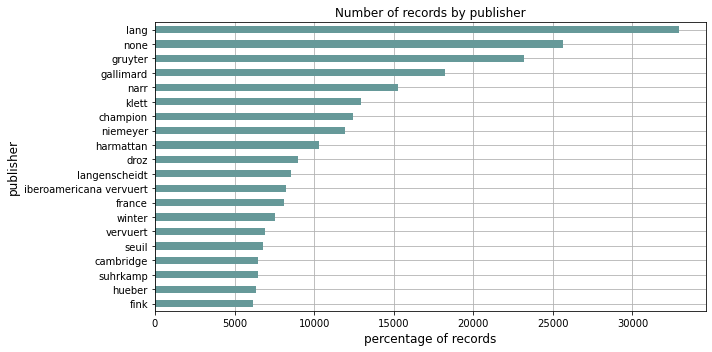

In [30]:
visualize.plot_bars(publishers_df, head=20, percentage = False, title = "Number of records by publisher", xlabel= "percentage of records", ylabel = "publisher", figure_name = "bar_publishers_number")        


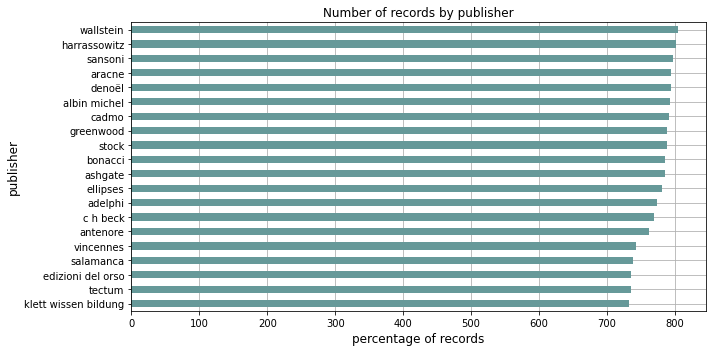

In [31]:
visualize.plot_bars(publishers_df, tail=20, percentage = False, title = "Number of records by publisher", xlabel= "percentage of records", ylabel = "publisher", figure_name = "bar_publishers_number_tail")        


In [32]:
publishers_lt = publishers_df.columns.tolist()

In [33]:
df = pd.concat([df, publishers_df], axis=1)

In [34]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ... ashgate ellipses adelphi  \
ppn                                            ...                            
1642067407              None             None  ...       0        0       0   
1678415065         Geneviève          Bollème  ...       0        0       0   
1678415065         Geneviève          Bollème  ...       0        0       0   
1678415065         Geneviève          Bollème  ...       0        0       0   
1678415065         Geneviève          Bollème  ...       0        0       0   
...                      ...              ...  ...     ...      ...     ...   
448323834              Klaus  Meyer-Minnemann  ...       0        0       0   
448323834              Klaus  Meyer-Minnemann  ...       0        0       0   
44832184X               None             None  ...       0        0       0   
44832184X               None             None  ...       0        0       0   
44832184X               None             None  ...       0        0       0   

           c h beck antenore vincennes salamanca edizioni del orso tectum  \
ppn 

In [35]:
publishers_lt

['lang',
 'none',
 'gruyter',
 'gallimard',
 'narr',
 'klett',
 'champion',
 'niemeyer',
 'harmattan',
 'droz',
 'langenscheidt',
 'iberoamericana vervuert',
 'france',
 'winter',
 'vervuert',
 'seuil',
 'cambridge',
 'suhrkamp',
 'hueber',
 'fink',
 'mondadori',
 'classiques garnier',
 'rodopi',
 'cátedra',
 'bulzoni',
 'einaudi',
 'romanistischer',
 'cornelsen',
 'larousse',
 'olschki',
 'reclam',
 'stauffenburg',
 'klett sprachen',
 'voltaire foundation',
 'transcript',
 'königshausen neumann',
 'oxford',
 'rowohlt',
 'narr francke attempto',
 'fayard',
 'hachette',
 'arco libros',
 'castalia',
 'routledge',
 'beck',
 'i mulino',
 'grasset',
 'rennes',
 'nathan',
 'flammarion',
 'hanser',
 'francke',
 'benjamins',
 'gredos',
 'lit',
 'reichenberger',
 'klincksieck',
 'metzler',
 'peter lang',
 'inse',
 'slatkine',
 'steiner',
 'vervuert iberoamericana',
 'colin',
 'gruyter mouton',
 'laterza',
 'espasa calpe',
 'pons',
 'garzanti',
 'salerno',
 'seix barral',
 'labor',
 'egert',
 'l

In [36]:
df.columns.value_counts()

nathan                  1
expression_info         1
lcc_notation            1
narr                    1
vervuert                1
                       ..
gredos                  1
fink                    1
ernst klett sprachen    1
editor_gnd_id           1
hachette                1
Length: 278, dtype: int64

In [37]:
#df.drop(columns="none", inplace=True)


In [38]:

years_publishers_df = df.groupby(["year_publication"])[publishers_lt].sum()

In [39]:
years_publishers_df

lang  none  gruyter  gallimard  narr  klett  champion  \
year_publication                                                          
1980               395   460       49        482   344     53        80   
1981               399   512      113        481   260     80        21   
1982               421   493       12        499   344     90        56   
1983               318   553       97        522   304    101       103   
1984               474   374       75        622   416    125        49   
1985               378   469       69        557   282    129        43   
1986               533   622       48        768   435    183        47   
1987               623   430       52        552   377    185        81   
1988               629   488       95        677   370    158        67   
1989               596   493      197        712   234    271        76   
1990               624   407      211        833   436    196        98   
1991               793   533      167        998   380    195       117   
1992               758   706       90        854   335    165        84   
1993               806   555      211        812   515    209       233   
1994              1058   798      373        725   495    305       288   
1995              1245   795      213        701   397    248       427   
1996               924  1199      346        633   396    349       368   
1997              1055   995      335        485   418    287       544   
1998              1066   888      225        414   534    712       723   
1999              1215   730      285        482   379    493       709   
2000              1409  1010      246        446   518    572       455   
2001              1115   811      396        454   423    704       894   
2002              1151   601      300        405   564    351       760   
2003              1066  1103      458        388   618    346       745   
2004              1196   987      340        331   451    462       582   
2005              1161  1127       96        331   580    547       542   
2006              1197   862      283        414   566    389       573   
2007              1385   868      105        396   598    588       523   
2008              1162  1002      173        327   411    563       465   
2009              1329   894      330        223   546    508       396   
2010              1321   644     1238        265   459    544       525   
2011              1265   409     4021        223   509    322       425   
2012              1249   480     3118        242   433    597       347   
2013              1194   542     1151        297   378    634       373   
2014               913   357     1369        147   282    598       364   
2015               522   293     1365        225   289    393       230   
2016                 2   330     1364         94     2    150         5   
2017                 1   376     1116         58     0     88         2   
2018                 0   246     1086         69     0     41         0   
2019                 1   212     1387         94    12     13         1   

                  niemeyer  harmattan  droz  ...  ashgate  ellipses  adelphi  \
year_publication                             ...                               
1980                   239         26   204  ...        0         0       16   
1981                   268         44   212  ...        0         0       15   
1982                   132         22   198  ...        0         0       24   
1983                   150         40   281  ...        0         0       27   
1984                   222         63   258  ...        0         0       42   
1985                   181         65   169  ...        0         5       17   
1986                   199        126   163  ...        0         4       42   
1987                   286         93   241  ...        0         2       39   
1988                   417         86   169  ...        0         0

In [40]:
years_publishers_rel_df = years_publishers_df.loc[:].div(years_publishers_df.sum(axis='columns'), axis="index")*100

In [41]:
years_publishers_rel_df

lang      none    gruyter  gallimard      narr  \
year_publication                                                       
1980              5.024806  5.851673   0.623330   6.131535  4.376034   
1981              4.993117  6.407208   1.414091   6.019272  3.253660   
1982              5.092537  5.963469   0.145155   6.036047  4.161123   
1983              3.607487  6.273398   1.100397   5.921724  3.448667   
1984              4.987899  3.935599   0.789224   6.545301  4.377565   
1985              3.889689  4.826096   0.710023   5.731632  2.901832   
1986              4.732309  5.522507   0.426174   6.818787  3.862204   
1987              5.442950  3.756771   0.454307   4.822645  3.293727   
1988              4.663405  3.618031   0.704330   5.019276  2.743179   
1989              4.401122  3.640526   1.454733   5.257717  1.727957   
1990              4.152802  2.708638   1.404233   5.543724  2.901637   
1991              4.902931  3.295412   1.032521   6.170397  2.349450   
1992              5.009252  4.665609   0.594766   5.643669  2.213851   
1993              5.229352  3.600856   1.368974   5.268280  3.341335   
1994              6.148660  4.637647   2.167722   4.213402  2.876736   
1995              7.682340  4.905591   1.314328   4.325558  2.449710   
1996              5.657951  7.341865   2.118670   3.876064  2.424836   
1997              6.425091  6.059683   2.040195   2.953715  2.545676   
1998              6.232096  5.191464   1.315405   2.420345  3.121894   
1999              7.068885  4.247149   1.658134   2.804282  2.205027   
2000              8.142155  5.836463   1.421554   2.577290  2.993355   
2001              6.520087  4.742413   2.315654   2.654816  2.473540   
2002              7.453215  3.891731   1.942628   2.622547  3.652140   
2003              7.091538  7.337680   3.046833   2.581160  4.111229   
2004              7.955301  6.565119   2.261541   2.201676  2.999867   
2005              7.498547  7.278951   0.620035   2.137829  3.746044   
2006              7.933457  5.713150   1.875663   2.743902  3.751326   
2007              8.529376  5.345486   0.646631   2.438724  3.682720   
2008              7.614180  6.565756   1.133609   2.142717  2.693139   
2009              8.976697  6.038501   2.228977   1.506248  3.687943   
2010              8.722927  4.252509   8.174855   1.749868  3.030903   
2011              7.453453  2.409852  23.691963   1.313929  2.999057   
2012              7.943777  3.052853  19.830821   1.539146  2.753927   
2013              8.990287  4.081018   8.666516   2.236277  2.846171   
2014              7.392114  2.890454  11.084123   1.190187  2.283216   
2015              4.373691  2.454964  11.436950   1.885212  2.421450   
2016              0.018227  3.007382  12.430511   0.856648  0.018227   
2017              0.010270  3.861559  11.461436   0.595666  0.000000   
2018              0.000000  2.666667  11.772358   0.747967  0.000000   
2019              0.012252  2.597403  16.993384   1.151679  0.147023   

                     klett  champion  niemeyer  harmattan      droz  ...  \
year_publication                                                     ...   
1980              0.674214  1.017682  3.040326   0.330747  2.595090  ...   
1981              1.001126  0.262796  3.353773   0.550619  2.652985  ...   
1982              1.088666  0.677392  1.596710   0.266118  2.395065  ...   
1983              1.145774  1.168463  1.701645   0.453772  3.187748  ...   
1984              1.315374  0.515627  2.336104   0.662949  2.714932  ...   
1985              1.327434  0.442478  1.862523   0.668862  1.739041  ...   
1986              1.624789  0.417296  1.766847   1.118707  1.447217  ...   
1987              1.616285  0.707671  2.498689   0.812511  2.105539  ...   
1988              1.171412  0.496738  3.091637   0.637604  1.252966  ...   
1989              2.001182  0.561217  2.990696   0.967361  1.528578  ...   
1990              1.304406  0.652203  3.041395   0.712099  1.903367  ...   
1991     

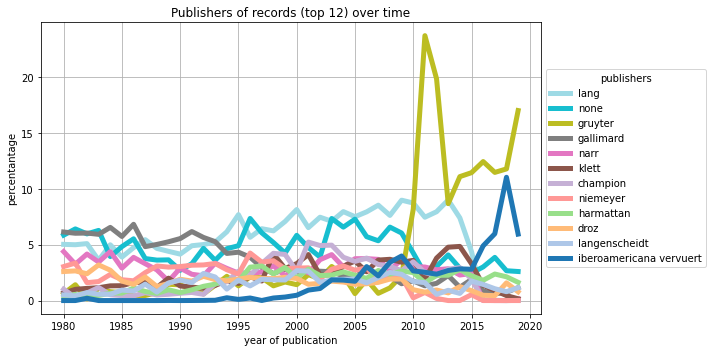

In [42]:
visualize.plot_lines(years_publishers_rel_df.iloc[:,0:12], title = "Publishers of records (top 12) over time", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "figure_11_area_publishers_chronological_top_12", title_legend = "publishers")


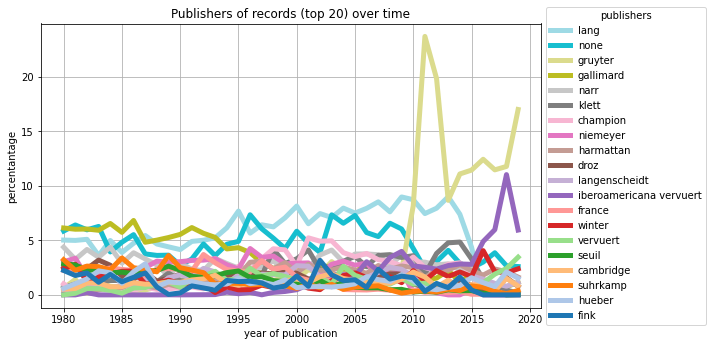

In [43]:
visualize.plot_lines(years_publishers_rel_df.iloc[:,0:20], title = "Publishers of records (top 20) over time", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "area_publishers_chronological_top_20", title_legend = "publishers")


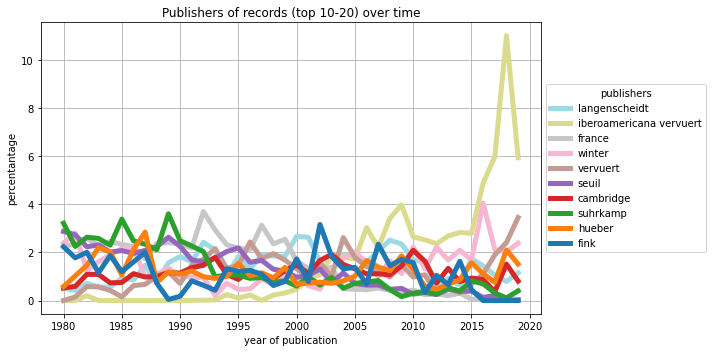

In [44]:
visualize.plot_lines(years_publishers_rel_df.iloc[:,10:20], title = "Publishers of records (top 10-20) over time", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "area_publishers_chronological_top_20", title_legend = "publishers")


In [45]:
years_publishers_rel_df.median(axis=1)

year_publication
1980    0.203536
1981    0.187711
1982    0.229829
1983    0.255247
1984    0.247290
1985    0.246964
1986    0.230844
1987    0.231522
1988    0.278025
1989    0.284301
1990    0.276188
1991    0.256585
1992    0.237906
1993    0.266009
1994    0.273145
1995    0.256078
1996    0.247995
1997    0.216200
1998    0.233850
1999    0.226902
2000    0.216700
2001    0.251447
2002    0.236353
2003    0.199574
2004    0.226154
2005    0.213137
2006    0.218717
2007    0.234019
2008    0.212961
2009    0.165485
2010    0.208003
2011    0.173816
2012    0.165363
2013    0.180709
2014    0.153834
2015    0.138249
2016    0.059236
2017    0.041080
2018    0.032520
2019    0.036756
dtype: float64

In [46]:
years_publishers_dummy_df = years_publishers_df.copy()
years_publishers_dummy_df.loc[ :] = 10

for index in years_publishers_dummy_df.index.tolist():
    years_publishers_dummy_df.loc[index, "gruyter"] = (index- 1979) * index


<AxesSubplot:xlabel='year_publication'>

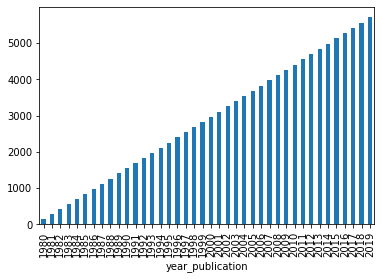

In [47]:
years_publishers_dummy_df.std(axis=1).plot.bar()

<AxesSubplot:xlabel='year_publication'>

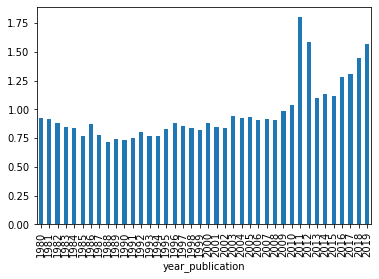

In [48]:
years_publishers_rel_df.std(axis=1).plot.bar()

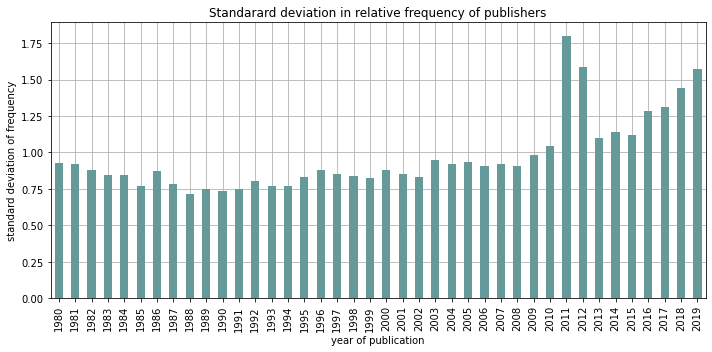

In [49]:
ax = years_publishers_rel_df.std(axis=1).plot.bar(figsize = figsize, title = "Standarard deviation in relative frequency of publishers", grid =True, color = color)

#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_axisbelow(True)

ax.set_xlabel("year of publication")
ax.set_ylabel("standard deviation of frequency")
fig = ax.get_figure()
plt.tight_layout()

fig.savefig( "./../visualizations/standard_deviation_relative_frequency_publishers.png", dpi=300, format="png")


<AxesSubplot:>

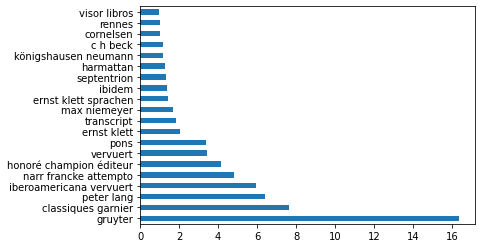

In [50]:
years_publishers_rel_df.diff().sum().sort_values(ascending=False).head(20).plot.barh()

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


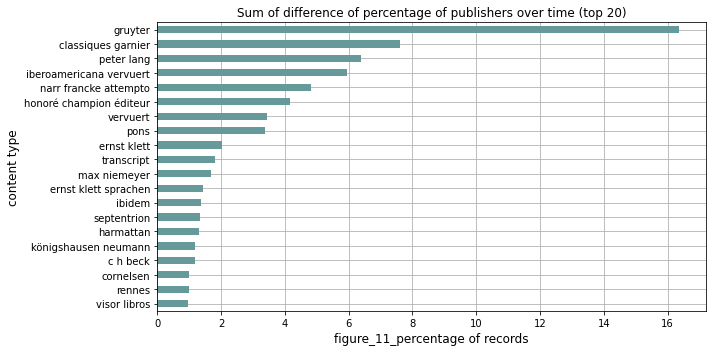

In [51]:
visualize.plot_bars(years_publishers_rel_df.diff(), head = 20, percentage = False, title = "Sum of difference of percentage of publishers over time (top 20)", xlabel= "figure_11_percentage of records", ylabel = "content type", figure_name = "bar_diff_publishers_head")

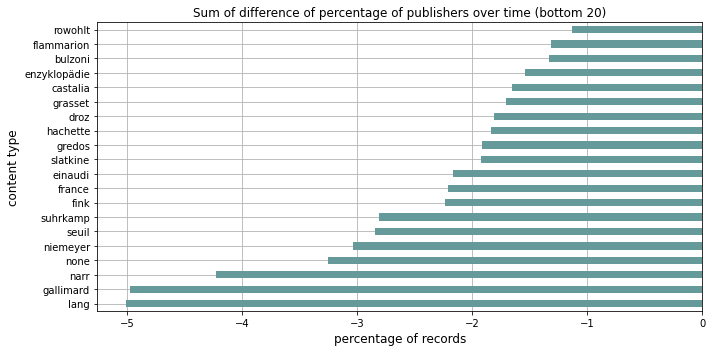

In [52]:
visualize.plot_bars(years_publishers_rel_df.diff(), tail = 20, percentage = False, title = "Sum of difference of percentage of publishers over time (bottom 20)", xlabel= "percentage of records", ylabel = "content type", figure_name = "figure_12_bar_diff_publishers_bottom_20")

In [53]:
regression_results_publishers_df = statistical_tests.calculate_regression_line(years_publishers_rel_df)

In [54]:
regression_results_publishers_df.loc[(regression_results_publishers_df["pvalue"] < 0.001) & (regression_results_publishers_df["slope"] > 0) ]

column     slope   intercept  \
column                                                                   
gruyter                                  gruyter  0.358757 -712.937408   
iberoamericana vervuert  iberoamericana vervuert  0.157027 -312.334192   
classiques garnier            classiques garnier  0.133552 -265.889465   
narr francke attempto      narr francke attempto  0.091296 -181.818724   
peter lang                            peter lang  0.075107 -149.583943   
transcript                            transcript  0.074237 -147.757780   
gruyter mouton                    gruyter mouton  0.060302 -120.061702   
honoré champion éditeur  honoré champion éditeur  0.055962 -111.464402   
pons                                        pons  0.055546 -110.597313   
harmattan                              harmattan  0.051466 -101.123976   
cornelsen                              cornelsen  0.048437  -96.144252   
rennes                                    rennes  0.040482  -80.438686   
königshausen neumann        königshausen neumann  0.035494  -70.386901   
ernst klett                          ernst klett  0.030952  -61.652831   
ernst klett sprachen        ernst klett sprachen  0.028849  -57.450253   
oxford                                    oxford  0.025729  -50.854167   
lit                                          lit  0.025244  -50.041162   
ibidem                                    ibidem  0.024580  -48.883194   
hermann                                  hermann  0.022969  -45.666031   
palgrave macmillan            palgrave macmillan  0.022741  -45.193088   
j b metzler                          j b metzler  0.022376  -44.548767   
frank timme                          frank timme  0.019946  -39.685711   
c h beck                                c h beck  0.018875  -37.573858   
septentrion                          septentrion  0.016682  -33.109247   
liverpoo                                liverpoo  0.015087  -29.960639   
erich schmidt                      erich schmidt  0.013882  -27.545086   
carocci                                  carocci  0.013752  -27.244969   
visor libros                        visor libros  0.013145  -26.081009   
sorbonne nouvelle              sorbonne nouvelle  0.013130  -26.035186   
iberoamericana                    iberoamericana  0.012773  -25.345280   
wallstein                              wallstein  0.011874  -23.596051   
brepols                                  brepols  0.011447  -22.727574   
schmetterling                      schmetterling  0.010859  -21.507233   
aracne                                    aracne  0.010590  -21.037936   
brill                                      brill  0.010539  -20.908963   
edizioni del orso              edizioni del orso  0.010018  -19.889812   
praesens                                praesens  0.009716  -19.262049   
verbum                                    verbum  0.009364  -18.563998   
tamesis                                  tamesis  0.008883  -17.593418   
ashgate                                  ashgate  0.008142  -16.149728   
cle international              cle international  0.005608  -11.043215   

                           rvalue        pvalue    stderr  
column                                                     
gruyter                  0.710527  2.802451e-07  0.057636  
iberoamericana vervuert  0.800811  5.491817e-10  0.019051  
classiques garnier       0.763680  9.938186e-09  0.018315  
narr francke attempto    0.623093  1.753339e-05  0.018591  
peter lang               0.547139  2.587597e-04  0.018640  
transcript               0.757600  1.519168e-08  0.010376  
gruyter mouton           0.598418  4.531927e-05  0.013097  
honoré champion éditeur  0.582446  8.046415e-05  0.012670  
pons                     0.704672  3.870306e-07  0.009073  
harmattan                0.715007  2.177337e-07  0.008163  
cornelsen                0.860816  1.054714e-12  0.004645  
rennes                   0.728613  9.817853e-08  0.006173  
königshausen neuman

In [55]:

regression_results_publishers_df.loc[(regression_results_publishers_df["pvalue"] < 0.001) & (regression_results_publishers_df["slope"] < 0) ]

column     slope   intercept    rvalue        pvalue  \
column                                                                     
soc i mulino  soc i mulino -0.004912    9.976317 -0.501066  9.901444e-04   
salamanca        salamanca -0.005817   11.760457 -0.616264  2.298770e-05   
schena              schena -0.005936   12.018414 -0.529373  4.441205e-04   
princeton        princeton -0.006480   13.114927 -0.604618  3.596443e-05   
zanichelli      zanichelli -0.006498   13.232771 -0.585269  7.285809e-05   
...                    ...       ...         ...       ...           ...   
seuil                seuil -0.070463  142.170696 -0.961405  6.735035e-23   
niemeyer          niemeyer -0.070833  143.712665 -0.660550  3.513446e-06   
suhrkamp          suhrkamp -0.073620  148.482001 -0.866924  4.753403e-13   
france              france -0.079647  160.728538 -0.862419  8.588400e-13   
gallimard        gallimard -0.156280  315.941811 -0.950123  7.970450e-21   

                stderr  
column                  
soc i mulino  0.001376  
salamanca     0.001206  
schena        0.001543  
princeton     0.001385  
zanichelli    0.001460  
...                ...  
seuil         0.003271  
niemeyer      0.013060  
suhrkamp      0.006866  
france        0.007584  
gallimard     0.008322  

[75 rows x 6 columns]

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


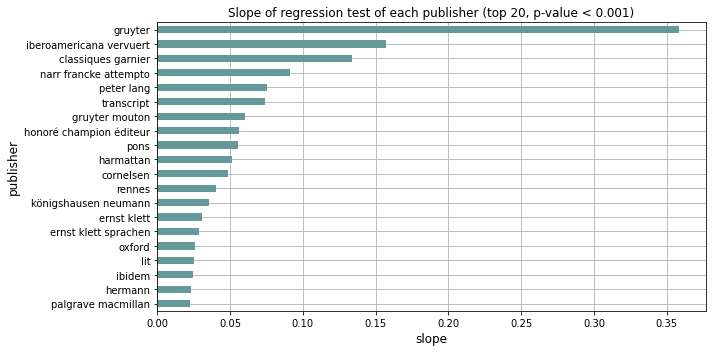

In [56]:
visualize.plot_bars(regression_results_publishers_df.loc[regression_results_publishers_df["pvalue"] < 0.001][["slope"]].head(20).T, title ="Slope of regression test of each publisher (top 20, p-value < 0.001)", xlabel ="slope", ylabel = "publisher", figure_name = "figure_12_bar_slop_publisher_top", figsize=(10,5))

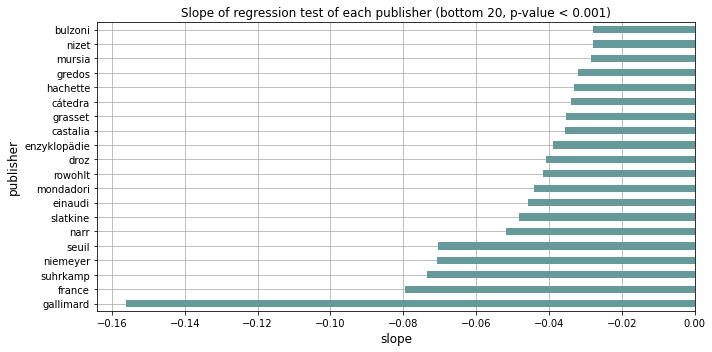

In [57]:
visualize.plot_bars(regression_results_publishers_df.loc[regression_results_publishers_df["pvalue"] < 0.001][["slope"]].tail(20).T, title ="Slope of regression test of each publisher (bottom 20, p-value < 0.001)", xlabel ="slope", ylabel = "publisher", figure_name = "figure_13_bar_slop_publisher", figsize=(10,5))

In [58]:

regression_results_publishers_df.loc[(regression_results_publishers_df["pvalue"] < 0.001) & (regression_results_publishers_df["slope"] < 0) ].tail(20).round(2)

column  slope  intercept  rvalue  pvalue  stderr
column                                                              
bulzoni            bulzoni  -0.03      56.49   -0.64     0.0    0.01
nizet                nizet  -0.03      56.35   -0.81     0.0    0.00
mursia              mursia  -0.03      57.43   -0.83     0.0    0.00
gredos              gredos  -0.03      64.34   -0.83     0.0    0.00
hachette          hachette  -0.03      66.62   -0.87     0.0    0.00
cátedra            cátedra  -0.03      68.62   -0.72     0.0    0.01
grasset            grasset  -0.04      71.12   -0.89     0.0    0.00
castalia          castalia  -0.04      71.82   -0.81     0.0    0.00
enzyklopädie  enzyklopädie  -0.04      77.99   -0.75     0.0    0.01
droz                  droz  -0.04      83.01   -0.77     0.0    0.01
rowohlt            rowohlt  -0.04      84.11   -0.71     0.0    0.01
mondadori        mondadori  -0.04      89.09   -0.81     0.0    0.01
einaudi            einaudi  -0.05      92.12   -0.89     0.0    0.00
slatkine          slatkine  -0.05      96.78   -0.75     0.0    0.01
narr                  narr  -0.05     106.23   -0.54     0.0    0.01
seuil                seuil  -0.07     142.17   -0.96     0.0    0.00
niemeyer          niemeyer  -0.07     143.71   -0.66     0.0    0.01
suhrkamp          suhrkamp  -0.07     148.48   -0.87     0.0    0.01
france              france  -0.08     160.73   -0.86     0.0    0.01
gallimard        gallimard  -0.16     315.94   -0.95     0.0    0.01